# Case Study Context

* An online travel agency wants to improve the hotel-booking experience by making it mobile-friendly and as
easy as chatting with a friend. 

* Some of the ways that they advertise the hotel rooms is through common hotel booking sites that aggregate rates from many OTA’s. 
* They are able to determine how much they would  like to spend on each click. 
* They can set a different spend per click for each itinerary (itinerary is the unique inputs of the search: hotel / length of stay / checkin date / etc...).
* If they spend more, they will be more likely to be shown and will appear higher in the ranking. 
* If they spend less, they will be shown lower in the ranking but if our bid is too low, they may not be shown
at all.

# Key Deliverables of the Case Study

* Identify key trends from booking and spending data
* How can the OTA agency improve?
* What are some deep insights based on the data

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import os
import seaborn as sns
os.getcwd()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
os.chdir('/Users/snehamehrin/Desktop/Project/data-analysis-project/data/raw')
import warnings
warnings.filterwarnings('ignore')
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

'/Users/snehamehrin'

In [3]:
#Reading the data
spend_df=pd.read_csv('spend.csv',dtype={'HOTEL_ID':'object'},parse_dates=['DATE'])
booking_df=pd.read_csv('bookings.csv',parse_dates=['DATE'],dtype={'EAN_ID':'object'})
#Exploring the data
print(color.BOLD + color.YELLOW +"First 5 rows of spending data " + color.END)
spend_df.head()
print(color.BOLD + color.YELLOW +"First 5 rows of booking data " + color.END)
booking_df.head()
print(color.BOLD + color.YELLOW +"Data Info Spending Data\n\n" + color.END)
spend_df.info()
print('\n\n')
print(color.BOLD + color.YELLOW +"Data Info Booking Data\n\n" + color.END)
booking_df.info()

#Rename columns
spend_df=spend_df.rename(columns={'DTA':'Days_Arrival','LOS':'Length Of Stay','BOOKING_DOW':'Day_Week','COMPARISON_TO_LOWEST_PRICE (%)':'Lowest_Price_%'}).drop(columns=['Unnamed: 10','Unnamed: 11'])
booking_df=booking_df.rename(columns={'DTA':'Days_Arrival','LOS':'Length Of Stay','BOOKING_DOW':'Day_Week'})

First 5 rows of spending data 


,DATE,HOTEL_ID,DTA,LOS,BOOKING_DOW,ELIGIBLE_IMPS,IMPRESSIONS,CLICKS,SPEND,COMPARISON_TO_LOWEST_PRICE (%),Unnamed: 10,Unnamed: 11
0,2020-03-12,112100,68,1,Thu,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2020-03-13,551314,1,1,Fri,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2020-03-14,145146,1,1,Sat,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2020-03-11,456469,1,1,Wed,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2020-03-12,233417,102,3,Thu,0.0,0.0,0.0,0.0,NaN,NaN,NaN


First 5 rows of booking data 


,DATE,EAN_ID,DTA,LOS,CHECK_IN_DATE,BOOKING_DOW,BOOKINGS,GMV
0,2020-03-15,109476,0,2,2020-03-15,Sun,1,68.088832
1,2020-03-20,219156,0,1,2020-03-20,Fri,1,64.857498
2,2020-03-15,105485,1,1,2020-03-16,Sun,1,116.797901
3,2020-03-17,122473,0,1,2020-03-17,Tue,1,118.256947
4,2020-03-15,201323,0,1,2020-03-15,Sun,1,47.299482


Data Info Spending Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   DATE                            1048575 non-null  datetime64[ns]
 1   HOTEL_ID                        1048575 non-null  object        
 2   DTA                             1048575 non-null  int64         
 3   LOS                             1048575 non-null  int64         
 4   BOOKING_DOW                     1048575 non-null  object        
 5   ELIGIBLE_IMPS                   1046229 non-null  float64       
 6   IMPRESSIONS                     1047969 non-null  float64       
 7   CLICKS                          1047969 non-null  float64       
 8   SPEND                           1047969 non-null  float64       
 9   COMPARISON_TO_LOWEST_PRICE (%)  417517 non-null   float64       
 10  Unnamed: 10     

## Key Observation

* There are null values in the columns ELIGIBLE_IMPS,IMPRESSIONS,CLICKS,SPEND and Lowest Price
* Assuming null values means zero in this case, imputing the null values with zero seems like a good way to clean this data.


## 2. Data Cleaning

In [346]:
cols=['ELIGIBLE_IMPS','IMPRESSIONS','CLICKS','SPEND','Lowest_Price_%']
def data_cleaning(data):
    for i in cols:
        data[cols]=data[cols].fillna(0)
    return data
spend_df=data_cleaning(spend_df)

## 3. Exploratory Data Analysis

In [347]:
pd.options.display.float_format = '{:.2f}'.format
spend_df.describe()

,Days_Arrival,Length Of Stay,ELIGIBLE_IMPS,IMPRESSIONS,CLICKS,SPEND,Lowest_Price_%
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,17.00,1.59,2.52,1.22,0.04,0.02,0.02
std,22.71,1.20,17.76,8.02,0.33,0.24,0.16
min,0.00,1.00,0.00,0.00,0.00,0.00,-71.02
25%,2.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,26.00,2.00,1.00,1.00,0.00,0.00,0.02
max,238.00,19.00,8559.00,2836.00,42.00,39.32,1.00


## Key Observations

### Days_Arrival
* Avg Length from booking to day of arrival is 17.However, since standard deviation is large in this case, mean doesn't seem like a valid statistic metric to consider.
* Less thatn 50% of the data has an average length as 8.
* Maximum length between booking to day of arrival is 238

### Length of Stay
* Less than 50% of the customers stay only for a day
* There seems to be 1 customer who has stayed over 19 days - Interesting data point to consider to see if it's an outlier

### Eligible Impression

* On avg snap commerce seems to have less than 2 impression rates to provide to the users for their search query.
* There seems to be a booking for which 8559 outliers are present - Further exploration needed

### Impressions

* On avg customers have viewed the impressions only zero times. 50% of the data , the avg impression rate is 0. This makes sense, since the eligible impression rate is also zero.
* However, there is an add which has been seen 2836 times by the user- Further exploration needed

### Clicks

* Less than 75% of the ads has been clicked zero times. This is not a good sign

## 4. Feature Engineering

* Calculate the day column of the date fields in spending and booking data
*

### 4.1 Formatting Dates
* In the first feature engineering process, we calculate the day number from date.
* We also order the Day of the week field , so that we can visualize properly.

In [348]:
def feature_engineering(df):
    """
    This function calculates the day of the month from the date field.
    If the input is 2020/03/12 then Day column will output to 12
    """
    df['DATE']=pd.to_datetime(df['DATE'])
    df['Day']=df['DATE'].dt.day
    df['Day_Week']=df['DATE'].dt.strftime('%a')
    df['Day_Week']=pd.Categorical(df['Day_Week'], categories=
    ['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat'],
    ordered=True)
    
    
    return df
booking_df=feature_engineering(booking_df)
spend_df=feature_engineering(spend_df)


### 4.2 Impressions & Clicks

* We calculate the **click rate( No of Clicks/Impressions)**- If the **Impressions are 0**, we default it to **zero**,since it doesn't make sense for the user to click without viewing it.
* We also calculate the **Impression rate(No Of Impressions/ELIGIBLE_IMPS)**-However, this might not be an accurate metric since **ELIGIBLE_IMPS** means if the snapcommerce had a **rate for that advertisement** and this might or might **not be shown to user**, so we do not know if the **Impression count** is the **no of times users viewed the advertisement** for which there is a **rate**.

In [349]:
#Let's look if people have viewed an advertisement even if snapcommerce does not have a Eligible Rate
no_imps=spend_df.loc[(spend_df['IMPRESSIONS']!=0) & (spend_df['ELIGIBLE_IMPS']==0)]

print('No Of Searches for which People have viewed the advertisement , but there is no Eligible Rate is {}'.format(no_imps.shape[0]))

no_clicks=spend_df.loc[(spend_df['IMPRESSIONS']==0) & (spend_df['CLICKS']!=0)]

print('No Of Searches for which People have clicked the advertisement, but there is no views is {}'.format(no_clicks.shape[0]))

No Of Searches for which People have viewed the advertisement , but there is no Eligible Rate is 30
No Of Searches for which People have clicked the advertisement, but there is no views is 359


 **30** seems a very small number compared to the overall dataset, so for now , I will calculate this rate and leave it open.
 
 **359** also seems like a very small number where clicks are not zero, but Impressions are zero, so I will calculate the click rate for now.

In [350]:
#Calculation Of Impression_Rate
spend_df['Impression_Rate']=spend_df.loc[spend_df['ELIGIBLE_IMPS']==0,'Impression_Rate']=0
spend_df['Impression_Rate']=spend_df.loc[spend_df['ELIGIBLE_IMPS']!=0,'Impression_Rate']=round(spend_df['IMPRESSIONS']/spend_df['ELIGIBLE_IMPS']*100)
#Calculation Of Click Rate
spend_df['Click_Rate']=spend_df.loc[spend_df['IMPRESSIONS']==0,'Impression_Rate']=0
spend_df['Click_Rate']=spend_df.loc[(spend_df['IMPRESSIONS']!=0) & (spend_df['CLICKS']!=0) ,'Impression_Rate']=round(spend_df['CLICKS']/spend_df['IMPRESSIONS']*100)
spend_df['Click_Rate']=spend_df.loc[(spend_df['IMPRESSIONS']!=0) & (spend_df['CLICKS']==0),'Impression_Rate']=0

## 3.1 Date


In [351]:
print("Range of Date for searches is from {0} to {1}".format(min(spend_df['DATE']),max(spend_df['DATE'])))
print("Unique Date Count for search is {}\n".format(spend_df['DATE'].nunique()))
print("Range of Date for bookings is from {0} to {1}".format(min(booking_df['DATE']),max(booking_df['DATE'])))
print("Unique Date Count for booking is {}\n".format(booking_df['DATE'].nunique()))

Range of Date for searches is from 2020-03-01 00:00:00 to 2020-03-30 00:00:00
Unique Date Count for search is 30

Range of Date for bookings is from 2020-03-01 00:00:00 to 2020-03-30 00:00:00
Unique Date Count for booking is 30



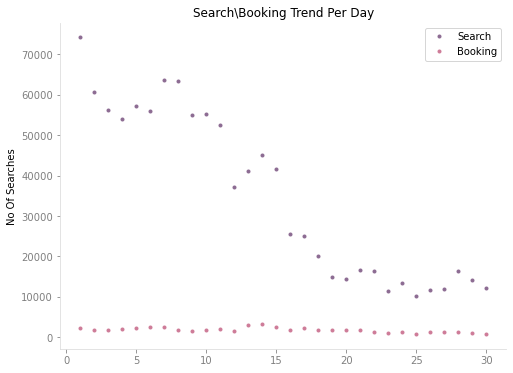

In [352]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
def date_eda(data_df,label,col,color):
    """
    This function plots the no of searches or bookings in a day.
    """
   
    df=pd.DataFrame(data_df[col].value_counts().rename_axis(col).reset_index(name='Count'))
    ax.plot(df[col],df['Count'],label=label,marker='.',linestyle='none',color=color)
    plt.title('Search\Booking Trend Per {}'.format(col))
    plt.ylabel('No Of Searches')
    ax.spines['bottom'].set_color('#DCDCDC')
    ax.spines['top'].set_color('none') 
    ax.spines['left'].set_color('#DCDCDC')
    ax.spines['right'].set_color('none')
    ax.xaxis.label.set_color('#DCDCDC')
    ax.tick_params(axis='x', colors='#808080')
    ax.tick_params(axis='y', colors='#808080')
    plt.savefig('rend.png', bbox_inches='tight',transparent=True,pad_inches=0)
    plt.legend()
    return df
    
    
   
df_spend=date_eda(spend_df,label='Search',col='Day',color='#8C6B92')
df_booking=date_eda(booking_df,label='Booking',col='Day',color='#CE7B98')


Text(Fri, 3, 'Eligible Impressions')

Text(Sat, 1.75, 'Impressions')

Text(Sat, 0.25, 'Clicks')

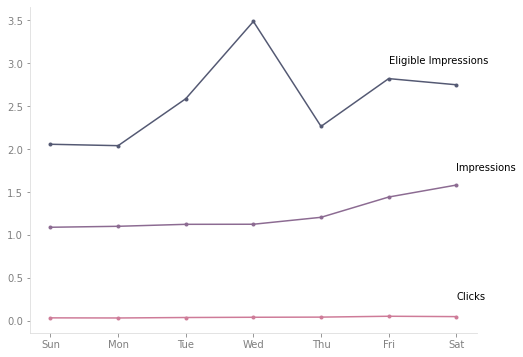

In [353]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(Impression_Trend['Day_Week'],Impression_Trend['ELIGIBLE_IMPS'],label='Eligible Impression',marker='.',color='#545973')
ax.plot(Impression_Trend['Day_Week'],Impression_Trend['IMPRESSIONS'],label='Impression',marker='.',color='#8C6B92')
ax.plot(Impression_Trend['Day_Week'],Impression_Trend['CLICKS'],label='Clicks',marker='.',color='#CE7B98')
ax.annotate('Eligible Impressions', xy=('Fri', 3))
ax.annotate('Impressions', xy=('Sat', 1.75))
ax.annotate('Clicks', xy=('Sat', 0.25))
ax.spines['bottom'].set_color('#DCDCDC')
ax.spines['top'].set_color('none') 
ax.spines['left'].set_color('#DCDCDC')
ax.spines['right'].set_color('none')
ax.xaxis.label.set_color('#DCDCDC')
ax.tick_params(axis='x', colors='#808080')
ax.tick_params(axis='y', colors='#808080')
plt.savefig('rend.png', bbox_inches='tight',transparent=True,pad_inches=0)

In [354]:
df_spend.describe()
df_booking.describe()

,Day,Count
count,30.00,30.00
mean,15.50,34952.50
std,8.80,21005.25
min,1.00,10145.00
25%,8.25,14522.75
50%,15.50,31336.00
75%,22.75,55118.50
max,30.00,74198.00


,Day,Count
count,30.00,30.00
mean,15.50,1830.40
std,8.80,607.33
min,1.00,810.00
25%,8.25,1358.25
50%,15.50,1848.00
75%,22.75,2217.75
max,30.00,3304.00


### Observations

* There are more searches than bookings - Not a good sign.
* 50% of the searches seems to be done within first 15 days of the month.
* 50% of the bookings seems to be done within first 15 days of the month.

### Our Goal
* Target Advertising during first half of the month.
* Convert searches into more booking- Why are our users not clicking on our ads?

### Observations

* Highest number of searches and bookings are during sundays
*Steep in searches during fridays and no search at all during thursdays
*Searches seem to pickup from Friday again
* Booking seems to follow the same pattern too

## Highlight Observations

* Target Advertising during weekends especially first half of the month
* Investigate more on why the number of searches are not converting into bookings

## 3.2 Length Of Stay

* In Length Of Stay, we aim to find out the common searches for the stay duration.
* We are trying to see, if people are searching more for vacation or short term stays.
* My hypothesis is that short term stay searches are more likely to be business meetings or staycation to nearby places.
* Long term stays might be for Vacations.

In [356]:
spend_df['Length Of Stay'].describe()

count   1048575.00
mean          1.59
std           1.20
min           1.00
25%           1.00
50%           1.00
75%           2.00
max          19.00
Name: Length Of Stay, dtype: float64

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

Text(0.5, 1.0, 'No Of Searches per Length Of Stay')

Text(0.5, 0, 'Length of Stay')

Text(0, 0.5, 'No Of Searches')

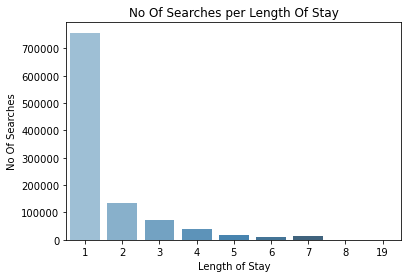

In [357]:
df=pd.DataFrame(spend_df['Length Of Stay'].value_counts().rename_axis('length_of_stay').reset_index(name='Count'))

sns.barplot(x=df['length_of_stay'],y=df['Count'],palette="Blues_d")
plt.title('No Of Searches per Length Of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('No Of Searches')
plt.show()

In [358]:
def length_of_stay_grouping(data,col):
    """
    This function creates a grouping for the length of stay column
    """
    data['length_of_stay_grouping']=np.select([
    data[col].between(1,2,inclusive=True),
    data[col].between(3,5,inclusive=True),
    data[col].between(6,8,inclusive=True),
    data[col]>9
],
[
    '1-2 days stay',
    '3-5 days stay',
    '6-8 days stay',
    'More than 8 days stay'
])
    return data

spend_df=length_of_stay_grouping(spend_df,'Length Of Stay')
booking_df=length_of_stay_grouping(booking_df,'Length Of Stay')

[Text(0.5, 0, 'Length Of Stay'),
 Text(0, 0.5, 'No Of Searches'),
 Text(0.5, 1.0, 'No Of Searches Per Length Of Stay')]

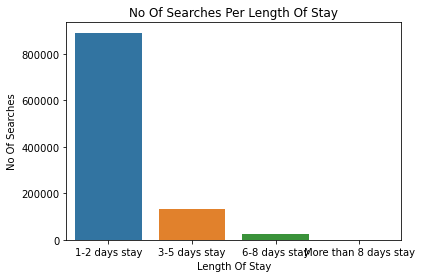

In [359]:
ax=sns.countplot(spend_df['length_of_stay_grouping'])
ax.set(xlabel='Length Of Stay',ylabel='No Of Searches',title='No Of Searches Per Length Of Stay')


[Text(0.5, 0, 'Length Of Stay'),
 Text(0, 0.5, 'No Of Bookings'),
 Text(0.5, 1.0, 'No Of Bookings Per Length Of Stay')]

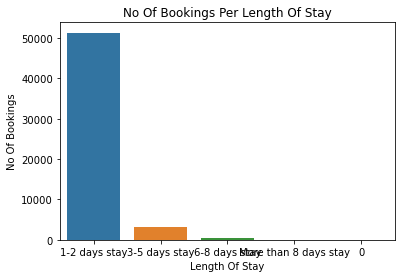

In [360]:
ax=sns.countplot(booking_df['length_of_stay_grouping'])
ax.set(xlabel='Length Of Stay',ylabel='No Of Bookings',title='No Of Bookings Per Length Of Stay')

### Observations

* Short-Stay(1-3) ,Medium Stay(4,5,6) searches and bookings seems to be more 

## 3.3 Hotel

* For this feature, we figure out how many times we search for a particular hotel.
* So , I group by hotel_id and count the number of searches.
* Then, I take the histogram of the count to figure out how many times the searches occur ,so that I can group them into buckets.
* Then,I bucket them into "Extremely High-Demand,High-Demand","Medium-Demand","Low-Demand" Hotels.
* This will give us an idea of how much SnapCommerce is spending on these high demand hotels.

count   83163.00
mean       12.61
std        24.34
min         1.00
25%         2.00
50%         6.00
75%        15.00
max      1028.00
Name: Count, dtype: float64

<AxesSubplot:xlabel='Count', ylabel='Density'>

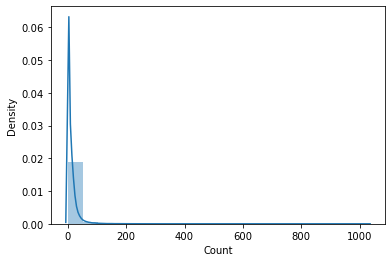

In [361]:
hotel_hist=pd.DataFrame(spend_df['HOTEL_ID'].value_counts().rename_axis('hotel_id').reset_index(name='Count'))
hotel_hist['Count'].describe()
sns.distplot(hotel_hist['Count'],bins=20)

In [362]:
#Merging the search count to the original data_set
spend_df=spend_df.merge(hotel_hist,left_on='HOTEL_ID',right_on='hotel_id')
spend_df=spend_df.drop(columns=['hotel_id']).rename(columns={'Count':'hotel_search_count'})

* We see that **75%** of the hotels are searched less than **15 times** in a month.
* **Few Hotels** are searched more than **200 times** - This is our **Golden Segment**, since these few hotesls have a potential to drive more revenue.


In [363]:

def hotel_rating(data,col):
    """
    This function creates a grouping for the demand of the hotel based on the search count
    """
    data['hotel_rating']=np.select([
    data[col].between(1,4,inclusive=True),
    data[col].between(5,15,inclusive=True),
    data[col].between(16,100,inclusive=True),
    data[col]>100
],
[
    'Low Demand(1-4 Searches)',
    'Medium Demand(5-15 Searches)',
    'High Demand(16-100 Searches)',
    'Extremely High Demand(>100 Searches)'
])
    return data
spend_df=hotel_rating(spend_df,'hotel_search_count')

<AxesSubplot:xlabel='hotel_rating', ylabel='count'>

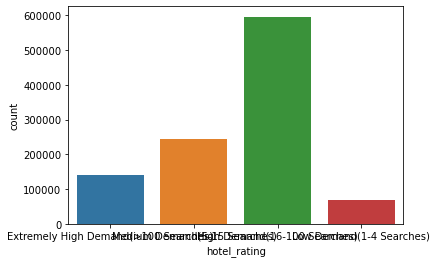

In [364]:
#Distribution of Hotel Rating
sns.countplot(spend_df['hotel_rating'])

## Observations

* Even though, we saw that there are few hotels searched multiple times by the users , but many users are searching for these hotels we can see that High Demand hotels has a potential to drive up our revenue

### 3.4 Days_Arrival

count   1048575.00
mean         17.00
std          22.71
min           0.00
25%           2.00
50%           8.00
75%          26.00
max         238.00
Name: Days_Arrival, dtype: float64

<AxesSubplot:xlabel='Days_Arrival'>

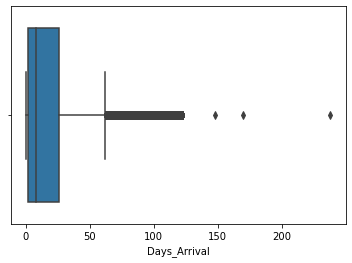

In [365]:
spend_df['Days_Arrival'].describe()
sns.boxplot(spend_df['Days_Arrival'])

In [366]:
def arrival_date(data,col):
    """
    This function creates a grouping for the length of stay column
    """
    data['booking_priority']=np.select([
    data[col].between(0,2,inclusive=True),
    data[col].between(3,10,inclusive=True),
    data[col].between(11,31,inclusive=True),
    data[col]>31
],
[
    'Priority Check-in(0-2 Days)',
    'Within 10 Days check-in',
    'Within a Month check-in',
    'After a Month check-in'
])
    return data
spend_df=arrival_date(spend_df,'Days_Arrival')
booking_df=arrival_date(booking_df,'Days_Arrival')

<AxesSubplot:xlabel='booking_priority', ylabel='count'>

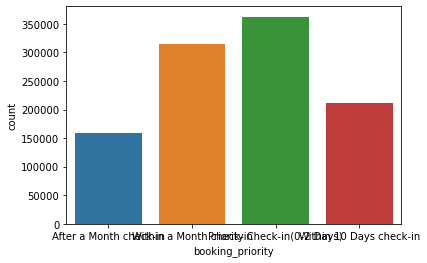

In [367]:
sns.countplot(spend_df['booking_priority'])

### Observations
* People seem to be searching for Urgent Booking and Low Priority Booking Hotels

### 3.5 Eligible IMPS

* Eligible IMPS suggests if snapcommerce had a rate for the search, this search might or not be shown to the user.
* It will be interesting to see, if snapcommerce had a rate for our High Search, Urgent Booking, Shorter Stay searches.

count   1048575.00
mean          2.52
std          17.76
min           0.00
25%           0.00
50%           0.00
75%           1.00
max        8559.00
Name: ELIGIBLE_IMPS, dtype: float64

<AxesSubplot:xlabel='ELIGIBLE_IMPS'>

60% Of the times snapcommerce had no rate to be shown to the user


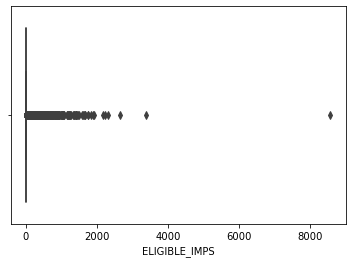

In [368]:
#Let's look at the overall distribution of the Eligible IMPS field
spend_df['ELIGIBLE_IMPS'].describe()
sns.boxplot(spend_df['ELIGIBLE_IMPS'])

rate=round(spend_df['ELIGIBLE_IMPS'].loc[spend_df['ELIGIBLE_IMPS']==0].shape[0]/spend_df.shape[0]*100)
print("{}% Of the times snapcommerce had no rate to be shown to the user".format(rate))

### Observations
* Box Plot suggests that there are way more outliers for this dataset.
* 75% of the searches have an Eligible Impression of 1. 50% of the dataset has no Eligible Impression.

**Does ELIGIBLE Impression rate has any correlation with any of the fields?
We will explore further**

### 3.6 Impressions

Impressions corresponds to number of times users viewed the advertisements.
If there are more views to the advertisement, then it could result in more clicks and essentially translate to booking.

count   1048575.00
mean          1.22
std           8.02
min           0.00
25%           0.00
50%           0.00
75%           1.00
max        2836.00
Name: IMPRESSIONS, dtype: float64

<AxesSubplot:xlabel='IMPRESSIONS'>

60% Of the times there were no views to the advertisement resulting from the search


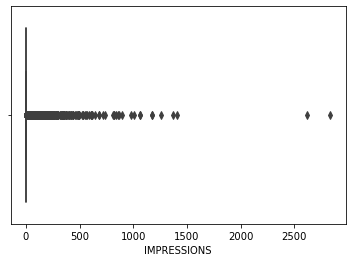

In [369]:
#Let's look at the overall distribution of the Impressions field
spend_df['IMPRESSIONS'].describe()
sns.boxplot(spend_df['IMPRESSIONS'])

rate=round(spend_df['IMPRESSIONS'].loc[spend_df['IMPRESSIONS']==0].shape[0]/spend_df.shape[0]*100)
print("{}% Of the times there were no views to the advertisement resulting from the search".format(rate))

### Observations
* **75%** of the **searches** resulted only in **1 View**. **50%** of the dataset have **no views**.
* Could it be that there are no rates for these advertisements or the bid is too low for this?

### 3.7 Clicks



count   1048575.00
mean          0.04
std           0.33
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          42.00
Name: CLICKS, dtype: float64

<AxesSubplot:xlabel='CLICKS'>

97% Of the times there were no clicks to the advertisement resulting from the search


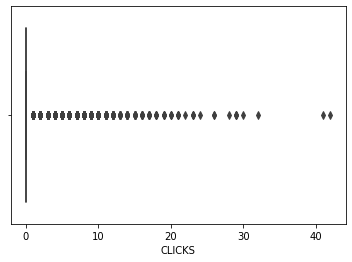

In [370]:
#Let's look at the overall distribution of the Impressions field
spend_df['CLICKS'].describe()
sns.boxplot(spend_df['CLICKS'])

rate=round(spend_df['CLICKS'].loc[spend_df['CLICKS']==0].shape[0]/spend_df.shape[0]*100)
print("{}% Of the times there were no clicks to the advertisement resulting from the search".format(rate))

### Observations

* Conversion rate from views to Clicks is very low.
* **97%** of the time there were **no clicks** to the advertisement resulting from the search

### 3.8 Spend

* Spend means the total amount snapcommerce spend for the clicks
* Since the clicks were very low , we can assume that spend might also have been very low.


count   1048575.00
mean          0.02
std           0.24
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          39.32
Name: SPEND, dtype: float64

<AxesSubplot:xlabel='SPEND'>

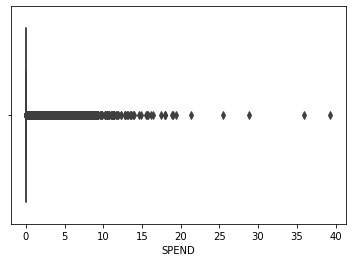

<AxesSubplot:xlabel='SPEND', ylabel='Density'>

98% Of the times there were no clicks to the advertisement resulting from the search


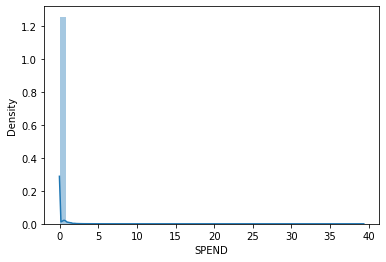

In [371]:
#Let's look at the overall distribution of the Impressions field
spend_df['SPEND'].describe()
sns.boxplot(spend_df['SPEND'])
plt.show()
sns.distplot(spend_df['SPEND'])
rate=round(spend_df['SPEND'].loc[spend_df['SPEND']==0].shape[0]/spend_df.shape[0]*100)
print("{}% Of the times there were no clicks to the advertisement resulting from the search".format(rate))

### 3.0 Lowest_Price

* **Lowest Price means the **% change from snap commerce's price and it's lowest competitors price**.
* My assumption is that if the **competitors price** is **lower** than **snap commerce** then this value will be **negative**.
* If it is **positive** then snapcommerce had a lower price than it's competitiors.

count   1048575.00
mean          0.02
std           0.16
min         -71.02
25%           0.00
50%           0.00
75%           0.02
max           1.00
Name: Lowest_Price_%, dtype: float64

<AxesSubplot:xlabel='Lowest_Price_%', ylabel='Density'>

88% of the time snap commerce's rate was lower than it's competitor's


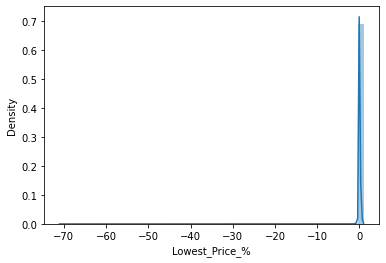

In [372]:
spend_df['Lowest_Price_%'].describe()
sns.distplot(spend_df['Lowest_Price_%'])
print ("{}% of the time snap commerce's rate was lower than it's competitor's".format(round(spend_df.loc[spend_df['Lowest_Price_%']>=0].shape[0]/spend_df.shape[0]*100)))

### Observations

* If 87% of the time snapcommerce had a lower price than it's competitors, then why are the clicks and views so low?


In [373]:
print("{}% of the times snap commerce had lowest price than the competitors but there was no eligible rate".format(round(spend_df.loc[(spend_df['Lowest_Price_%']>=0) & (spend_df['ELIGIBLE_IMPS']==0)].shape[0]/spend_df.shape[0]*100)))

60% of the times snap commerce had lowest price than the competitors but there was no eligible rate


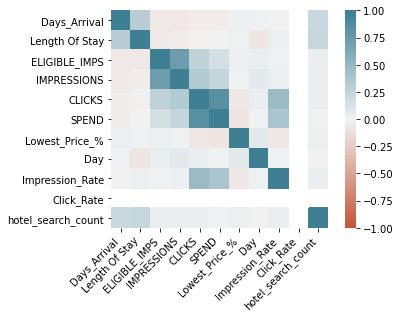

In [374]:
corr=spend_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='SPEND', ylabel='CLICKS'>

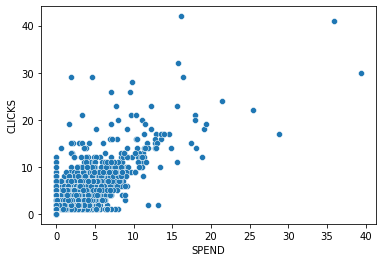

In [375]:
sns.scatterplot(data=spend_df, x="SPEND", y="CLICKS")

## 4 Bookings EDA

In [376]:
booking_df.describe()

,Days_Arrival,Length Of Stay,BOOKINGS,GMV,Day
count,54912.00,54912.00,54912.00,54912.00,54912.00
mean,2.63,1.33,1.12,108.44,13.69
std,11.01,0.82,0.48,90.63,7.97
min,0.00,1.00,1.00,10.11,1.00
25%,0.00,1.00,1.00,60.60,7.00
50%,0.00,1.00,1.00,82.68,13.00
75%,1.00,1.00,1.00,122.93,20.00
max,364.00,17.00,19.00,3405.32,30.00


### 4.1 Days Arrival

In [377]:
def booking_eda(data):
    sns.boxplot(data)
    plt.show()
    sns.distplot(data)
    plt.show()

In [378]:
booking_df.describe()

,Days_Arrival,Length Of Stay,BOOKINGS,GMV,Day
count,54912.00,54912.00,54912.00,54912.00,54912.00
mean,2.63,1.33,1.12,108.44,13.69
std,11.01,0.82,0.48,90.63,7.97
min,0.00,1.00,1.00,10.11,1.00
25%,0.00,1.00,1.00,60.60,7.00
50%,0.00,1.00,1.00,82.68,13.00
75%,1.00,1.00,1.00,122.93,20.00
max,364.00,17.00,19.00,3405.32,30.00


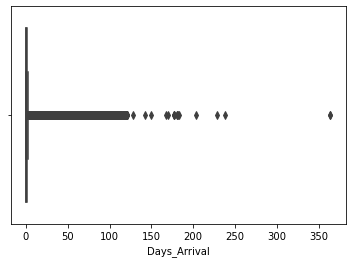

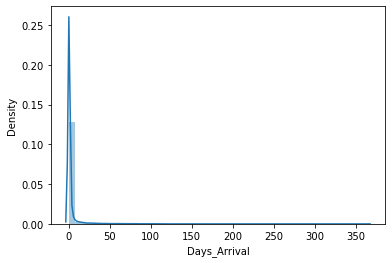

In [379]:
booking_eda(booking_df['Days_Arrival'])

<AxesSubplot:xlabel='booking_priority', ylabel='count'>

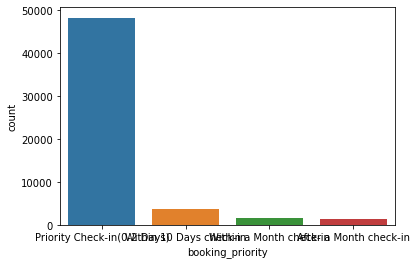

In [380]:
sns.countplot(booking_df['booking_priority'])

In [381]:
booking_df.columns

Index(['DATE', 'EAN_ID', 'Days_Arrival', 'Length Of Stay', 'CHECK_IN_DATE',
       'Day_Week', 'BOOKINGS', 'GMV', 'Day', 'length_of_stay_grouping',
       'booking_priority'],
      dtype='object')

### 4.2 Length Of Stay

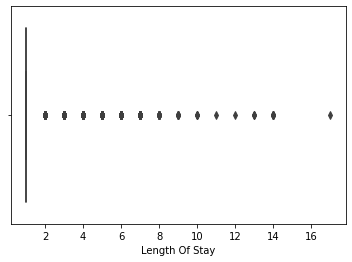

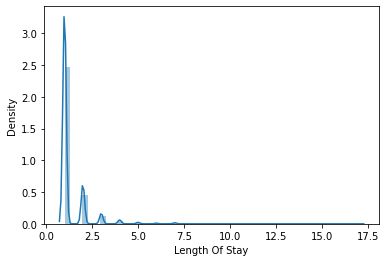

In [382]:
booking_eda(booking_df['Length Of Stay'])

<AxesSubplot:xlabel='length_of_stay_grouping', ylabel='count'>

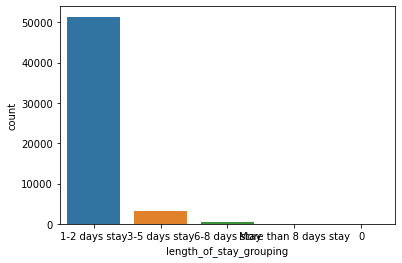

In [383]:
sns.countplot(booking_df['length_of_stay_grouping'])

### 4.3 Bookings

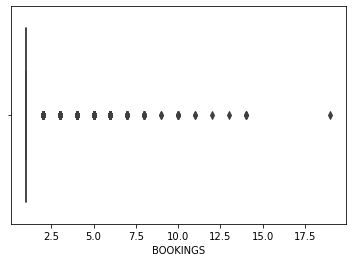

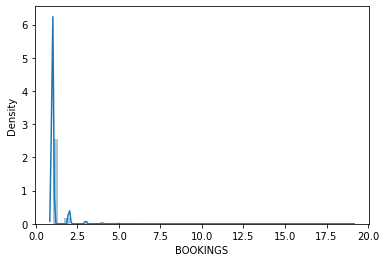

In [384]:
booking_eda(booking_df['BOOKINGS'])

<AxesSubplot:xlabel='BOOKINGS', ylabel='count'>

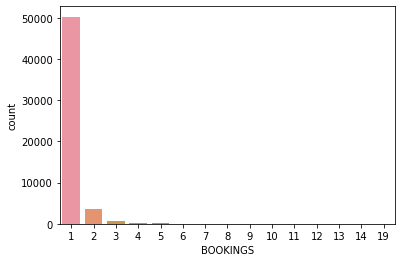

In [385]:
sns.countplot(booking_df['BOOKINGS'])

### 4.4 GMV

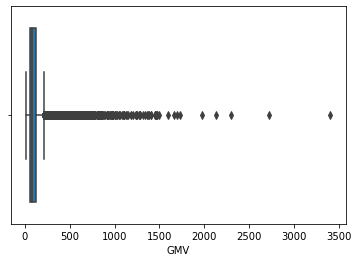

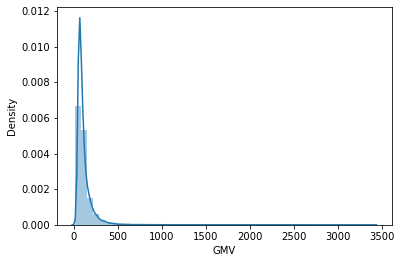

In [386]:
booking_eda(booking_df['GMV'])

In [387]:
booking_df.corr()

,Days_Arrival,Length Of Stay,BOOKINGS,GMV,Day
Days_Arrival,1.00,0.20,-0.04,0.25,-0.11
Length Of Stay,0.20,1.00,-0.07,0.61,-0.05
BOOKINGS,-0.04,-0.07,1.00,0.29,-0.01
GMV,0.25,0.61,0.29,1.00,-0.15
Day,-0.11,-0.05,-0.01,-0.15,1.00


<AxesSubplot:xlabel='Day', ylabel='GMV'>

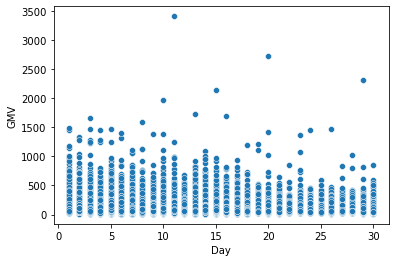

In [388]:
sns.scatterplot(data=booking_df, x="Day", y="GMV")

### 4.5 Hotel ID

In [389]:
hotel_hist=pd.DataFrame(booking_df['EAN_ID'].value_counts().rename_axis('Hotel').reset_index(name='Count'))
hotel_hist['Count'].describe()
print("{}% Of Hotels has been booked more than once".format(round(hotel_hist.loc[hotel_hist['Count']>1].shape[0]/hotel_hist.shape[0]*100,0)))
print("{}% Of Hotels has been booked more than 4 times".format(round(hotel_hist.loc[hotel_hist['Count']>4].shape[0]/hotel_hist.shape[0]*100,0)))

count   13895.00
mean        3.95
std         6.86
min         1.00
25%         1.00
50%         2.00
75%         4.00
max       241.00
Name: Count, dtype: float64

58.0% Of Hotels has been booked more than once
22.0% Of Hotels has been booked more than 4 times


In [390]:
booking_df=booking_df.merge(hotel_hist,left_on='EAN_ID',right_on='Hotel')
booking_df.rename(columns={'Count':'hotel_booking_count'},inplace=True)

In [391]:

def hotel_booking_rating(data,col):
    """
    This function creates a grouping for the demand of the hotel based on the search count
    """
    data['hotel_booking_rating']=np.select([
    data[col].between(1,1,inclusive=True),
    data[col].between(2,10,inclusive=True),
    data[col].between(10,100,inclusive=True),
    data[col]>=101
],
[
    'Low Demand Hotels(1 Booking)',
    'Medium Demand Hotels(2-10 Bookings)',
    'High Demand Hotels(10-100 Bookings)',
    'Extremely High Demand Hotels(>100 Bookings)'
])
    return data
booking_df=hotel_booking_rating(booking_df,'hotel_booking_count')

In [397]:

booking_df['hotel_booking_rating'].value_counts()

Medium Demand Hotels(2-10 Bookings)            26868
High Demand Hotels(10-100 Bookings)            21163
Low Demand Hotels(1 Booking)                    5865
Extremely High Demand Hotels(>100 Bookings)     1016
Name: hotel_booking_rating, dtype: int64

### Observations
* There is a handful of hotels that has been booked more than 4 times.
* We need to focus on the hotels that are booked only few times and see if they are searched by the users as well.
* If they are we need to focus our ad strategy on these hotels

## Key Questions

### 1. How many searches and bookings

In [399]:
print('No of Searches is {}'.format(spend_df.shape[0]))
print('No of Bookings is {}'.format(booking_df.shape[0]))

No of Searches is 1048575
No of Bookings is 54912


### 2. What are the popular searches

In [435]:
def group_by_fun(data,groupby,agg):
    c=data.groupby(groupby)[agg].count().rename("count")
    return (c/c.sum())*100
    

In [446]:
hotel_rating=group_by_fun(spend_df,'length_of_stay_grouping','HOTEL_ID')
print('% Of Users who Searched for Length Of Stay\n')
hotel_rating

check_in=group_by_fun(spend_df,'booking_priority','HOTEL_ID')
print('% Of Users who Searched for Check-in dates\n')
check_in

hotel_rating=group_by_fun(spend_df,'hotel_rating','HOTEL_ID')
print('% Of Users who Searched for hotel subsset\n')
hotel_rating

% Of Users who Searched for Length Of Stay



length_of_stay_grouping
1-2 days stay           85.03
3-5 days stay           12.54
6-8 days stay            2.42
More than 8 days stay    0.00
Name: count, dtype: float64

% Of Users who Searched for Check-in dates



booking_priority
After a Month check-in        15.21
Priority Check-in(0-2 Days)   34.55
Within 10 Days check-in       20.19
Within a Month check-in       30.05
Name: count, dtype: float64

% Of Users who Searched for hotel subsset



hotel_rating
Extremely High Demand(>100 Searches)   13.35
High Demand(16-100 Searches)           56.79
Low Demand(1-4 Searches)                6.64
Medium Demand(5-15 Searches)           23.23
Name: count, dtype: float64

In [474]:
spend_df.loc[spend_df['hotel_rating']=='Low Demand(1-4 Searches)'].describe()

,Days_Arrival,Length Of Stay,ELIGIBLE_IMPS,IMPRESSIONS,CLICKS,SPEND,Lowest_Price_%,Day,Impression_Rate,Click_Rate,hotel_search_count
count,69584.00,69584.00,69584.00,69584.00,69584.00,69584.00,69584.00,69584.00,69584.00,69584.00,69584.00
mean,14.86,1.30,1.35,0.69,0.01,0.00,0.04,11.44,0.41,0.00,2.50
std,20.07,0.98,32.96,3.77,0.12,0.06,0.13,8.38,5.87,0.00,1.12
min,0.00,1.00,0.00,0.00,0.00,0.00,-6.85,1.00,0.00,0.00,1.00
25%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,2.00
50%,6.00,1.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,2.00
75%,25.00,1.00,1.00,1.00,0.00,0.00,0.06,16.00,0.00,0.00,3.25
max,122.00,7.00,8559.00,855.00,9.00,8.53,1.00,30.00,200.00,0.00,4.00


## 3 . When do users search

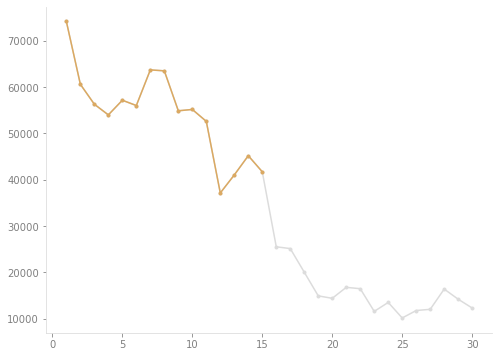

In [447]:
search_trend=pd.DataFrame(spend_df.groupby("Day", as_index=False)['HOTEL_ID'].count())
booking_trend=pd.DataFrame(booking_df.groupby("Day", as_index=False)['EAN_ID'].count())
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


ax.plot(search_trend['Day'],search_trend['HOTEL_ID'],label='Search',marker='.',color='#DCDCDC')
ax.plot(search_trend['Day'].loc[search_trend['Day']<=15],search_trend['HOTEL_ID'].loc[search_trend['Day']<=15],label='Search',marker='.',color='#dba961')





ax.spines['bottom'].set_color('#DCDCDC')
ax.spines['top'].set_color('none') 
ax.spines['left'].set_color('#DCDCDC')
ax.spines['right'].set_color('none')
ax.xaxis.label.set_color('#DCDCDC')
ax.tick_params(axis='x', colors='#808080')
ax.tick_params(axis='y', colors='#808080')
plt.savefig('week_trend.png', bbox_inches='tight',transparent=True,pad_inches=0)

In [ ]:
search_trend=pd.DataFrame(spend_df.groupby("Day_Week", as_index=False)['HOTEL_ID'].count())
booking_trend=pd.DataFrame(booking_df.groupby("Day_Week", as_index=False)['EAN_ID'].count())

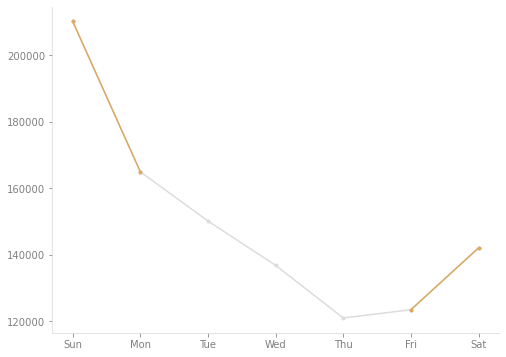

In [449]:
search_trend=pd.DataFrame(spend_df.groupby("Day_Week", as_index=False)['HOTEL_ID'].count())
booking_trend=pd.DataFrame(booking_df.groupby("Day_Week", as_index=False)['EAN_ID'].count())
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


ax.plot(search_trend['Day_Week'],search_trend['HOTEL_ID'],label='Search',marker='.',color='#DCDCDC')
ax.plot(search_trend['Day_Week'].loc[(search_trend['Day_Week']=='Sun') | (search_trend['Day_Week']=='Mon')] ,search_trend['HOTEL_ID'].loc[(search_trend['Day_Week']=='Sun') | (search_trend['Day_Week']=='Mon')],label='Search',marker='.',color='#dba961')
ax.plot(search_trend['Day_Week'].loc[(search_trend['Day_Week']=='Fri') | (search_trend['Day_Week']=='Sat')] ,search_trend['HOTEL_ID'].loc[(search_trend['Day_Week']=='Fri') | (search_trend['Day_Week']=='Sat')],label='Search',marker='.',color='#dba961')




ax.spines['bottom'].set_color('#DCDCDC')
ax.spines['top'].set_color('none') 
ax.spines['left'].set_color('#DCDCDC')
ax.spines['right'].set_color('none')
ax.xaxis.label.set_color('#DCDCDC')
ax.tick_params(axis='x', colors='#808080')
ax.tick_params(axis='y', colors='#808080')
plt.savefig('day_trend.png', bbox_inches='tight',transparent=True,pad_inches=0)

### 4. % Of Searches for which no rate and lower price

In [499]:
spend_df['ELIGIBLE_IMPS'].describe()
spend_df['Lowest_Price_%']=spend_df['Lowest_Price_%'].round(2)
spend_df['Lowest_Price_%'].describe()
snapcommerce_adv=spend_df.loc[(spend_df.ELIGIBLE_IMPS>0) & (spend_df['Lowest_Price_%']>=0)]
spend_df['Eligible Rate'] ='Eligible Rate N/A'
spend_df.loc[(spend_df.ELIGIBLE_IMPS>0) & (spend_df['Lowest_Price_%']>=0),'Eligible Rate'] ='Eligible Rate Available'
snapcommerce_adv.shape[0]
snapcommerce_adv.shape[0]/spend_df.shape[0]

count   1048575.00
mean          2.52
std          17.76
min           0.00
25%           0.00
50%           0.00
75%           1.00
max        8559.00
Name: ELIGIBLE_IMPS, dtype: float64

count   1048575.00
mean          0.02
std           0.16
min         -71.02
25%           0.00
50%           0.00
75%           0.02
max           1.00
Name: Lowest_Price_%, dtype: float64

300511

0.28658989581098154

### 5.Calculating High Demand Searches

In [500]:
highest_searches=spend_df.loc[((spend_df['hotel_rating']=="High Demand(16-100 Searches)") | (spend_df['hotel_rating']=="Medium Demand(5-15 Searches)")) & ((spend_df['length_of_stay_grouping']== '1-2 days stay') & (spend_df.booking_priority=='Priority Check-in(0-2 Days)'))]
spend_df['Search Rating']='Unpopular Search'
spend_df.loc[((spend_df['hotel_rating']=="High Demand(16-100 Searches)") | (spend_df['hotel_rating']=="Medium Demand(5-15 Searches)")) & ((spend_df['length_of_stay_grouping']== '1-2 days stay') & (spend_df.booking_priority=='Priority Check-in(0-2 Days)')),'Search Rating']="Popular Search"

highest_searches.shape[0]
highest_searches.shape[0]/spend_df.shape[0]

289901

0.2764714016641633

In [501]:
spend_df['Rating'] ="Unpopular Search Eligible Rate N/A"
spend_df.loc[((spend_df['Search Rating']=="Popular Search") & (spend_df['Eligible Rate']=="Eligible Rate Available")) ,'Rating']="Popular Search Rate Available"
spend_df.loc[((spend_df['Search Rating']=="Popular Search") & (spend_df['Eligible Rate']=="Eligible Rate N/A")) ,'Rating']="Popular Search Eligible Rate N/A"
spend_df.loc[((spend_df['Search Rating']=="Unpopular Search") & (spend_df['Eligible Rate']=="Eligible Rate Available")) ,'Rating']="Unpopular Search Eligible Rate Available"

rating=group_by_fun(spend_df,'Rating','HOTEL_ID')
rating

Rating
Popular Search Eligible Rate N/A           17.59
Popular Search Rate Available              10.05
Unpopular Search Eligible Rate Available   18.61
Unpopular Search Eligible Rate N/A         53.75
Name: count, dtype: float64

<bound method Artist.set of <AxesSubplot:xlabel='SPEND', ylabel='CLICKS'>>

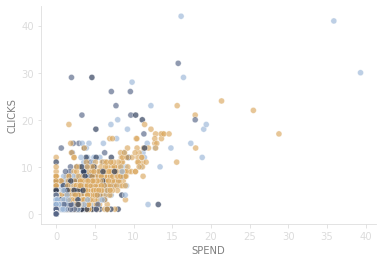

In [469]:
color_dict = dict({'Unpopular Search Eligible Rate N/A':'#576687',
                  'Popular Search Eligible Rate N/A':'#273755',
                  'Unpopular Search Eligible Rate Available': '#9bb7d8',
                  'Popular Search Rate Available' :'#dba961'})

fig = plt.figure()

ax=sns.scatterplot(data=spend_df, x="SPEND", y="CLICKS", hue="Rating", palette=color_dict,legend=False,alpha=0.66)
ax.set
ax.spines['bottom'].set_color('#DCDCDC')

ax.spines['top'].set_color('none') 

ax.spines['left'].set_color('#DCDCDC')

ax.spines['right'].set_color('None')

ax.xaxis.label.set_color('#808080')
ax.yaxis.label.set_color('#808080')

ax.tick_params(axis='x', colors='#DCDCDC')
ax.tick_params(axis='y', colors='#DCDCDC')


plt.savefig('scatterplot', bbox_inches='tight',transparent=True,pad_inches=0)

## Booking Trends within Itineraries

In [487]:
spend_df_length_of_stay=spend_df.groupby(['Day_Week','length_of_stay_grouping'])['HOTEL_ID'].count()
booking_df_scatter=booking_df.groupby("booking_priority").agg(Avg_GMV=pd.NamedAgg(column='GMV', aggfunc=np.mean),
                                                              Booking_sum=pd.NamedAgg(column='BOOKINGS',aggfunc=np.sum)).reset_index().sort_values(by='Booking_sum')

<BarContainer object of 4 artists>

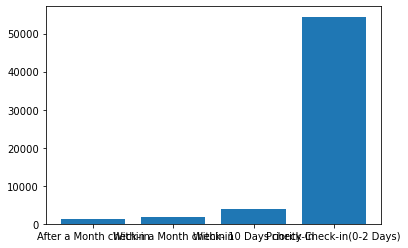

In [488]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(booking_df_scatter['booking_priority'], booking_df_scatter['Booking_sum'])


In [489]:
booking_df_scatter.value_counts()

booking_priority             Avg_GMV  Booking_sum
Within a Month check-in      172.97   1753           1
Within 10 Days check-in      146.30   3839           1
Priority Check-in(0-2 Days)  100.06   54443          1
After a Month check-in       229.25   1335           1
dtype: int64